# **Data for Our 10 Genes**

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd
import warnings
warnings.simplefilter("ignore")

## **Myosin Genes: MYL3, MYBPC3, MYL2, MYH6, and MYH7**

In [40]:
myh7 = pd.read_csv('Data-for-Project/Data/clinvar_result.txt', sep = "\t")

# filtering for only mhy7
myh7 = myh7[myh7['Gene(s)'] == 'MYH7']

# filtering for HCM conditions
myh7_HCM = myh7['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")

# filtering for non-NaN protein changes
myh7_filtered = myh7[myh7_HCM].dropna(subset = ["Protein change"])

# changing to input format for mutplot
myh7_filtered = myh7_filtered[['Gene(s)', 'Protein change']]
myh7_filtered.rename(columns = {'Gene(s)':'Hugo_Symbol', 'Protein change':'Protein_Change'}, inplace = True)

myh7_filtered['Sample_ID'] = [i for i in range(myh7_filtered.shape[0])]
myh7_filtered['Mutation_Type'] = 0
 
myh7_filtered = myh7_filtered[list(('Hugo_Symbol','Sample_ID','Protein_Change', 'Mutation_Type'))]

myh7_filtered

# myh7_filtered.to_csv('myh7_filtered.csv')

,Hugo_Symbol,Sample_ID,Protein_Change,Mutation_Type
15,MYH7,0,E1934K,0
16,MYH7,1,N1933I,0
17,MYH7,2,N1933S,0
24,MYH7,3,K1930T,0
25,MYH7,4,T1929M,0
...,...,...,...,...
2325,MYH7,1068,E5D,0
2326,MYH7,1069,S4W,0
2327,MYH7,1070,S4L,0
2328,MYH7,1071,D3E,0


In [54]:
count = [0] * 2000

for i in myh7_filtered.index:
    s = str(myh7_filtered['Protein_Change'][i])
    x_value = int("".join([ele for ele in s if ele.isdigit()]))
    count[x_value] += 1

[0,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 4,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 3,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 3,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 3,
 4,
 0,
 1,
 3,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 3,
 5,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 3,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 3,
 0,
 1,
 0,
 1,
 0,
 3,
 2,
 4,


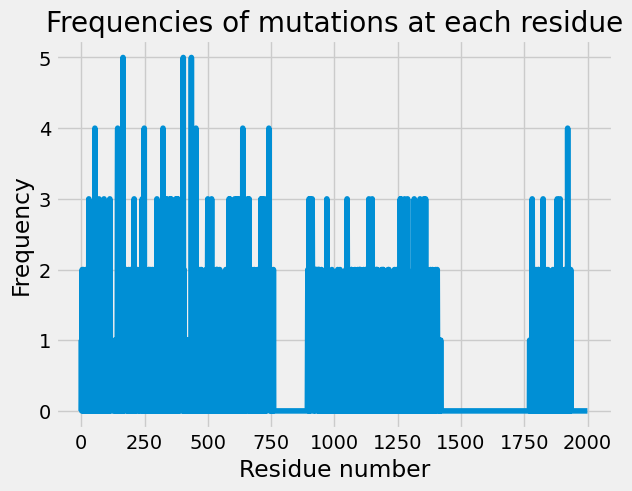

In [56]:
import matplotlib.pyplot as plt
  
# x axis values
x = [i for i in range(2000)]
# corresponding y axis values
y = count
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('Residue number')
# naming the y axis
plt.ylabel('Frequency')
  
# giving a title to my graph
plt.title('Frequencies of mutations at each residue')
  
# function to show the plot
plt.show()

In [59]:
for ii, c in enumerate(count):
    if c > 3:
        print(ii)

54
144
165
249
323
403
435
453
638
741
1921
